In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_churn_sample_2000.csv to customer_churn_sample_2000 (1).csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Geography        2000 non-null   object
 4   Tenure           2000 non-null   int64 
 5   NumOfProducts    2000 non-null   int64 
 6   IsActiveMember   2000 non-null   int64 
 7   EstimatedSalary  2000 non-null   int64 
 8   Churn            2000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 140.8+ KB
None
        CustomerID          Age       Tenure  NumOfProducts  IsActiveMember  \
count  2000.000000  2000.000000  2000.000000    2000.000000     2000.000000   
mean   2000.500000    41.109500     5.051000       2.006500        0.488500   
std     577.494589    13.477735     3.151724       0.810423        0.499993   
min    1001.000000    18.0

<ipython-input-7-89bd086e0f53>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


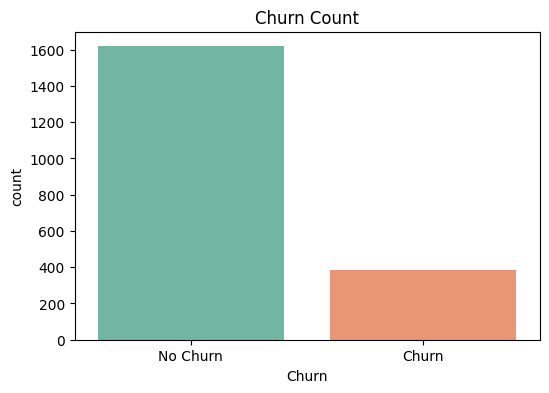

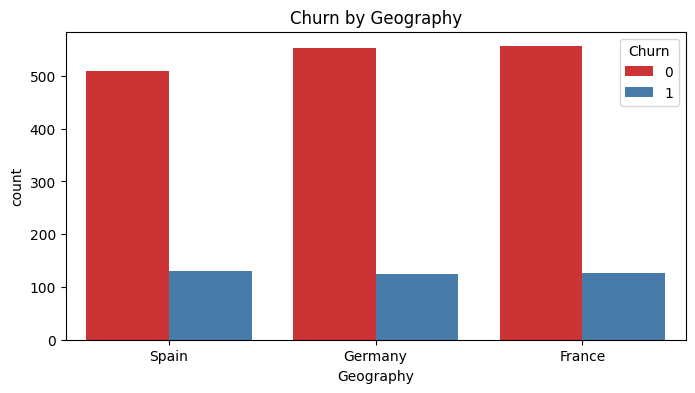

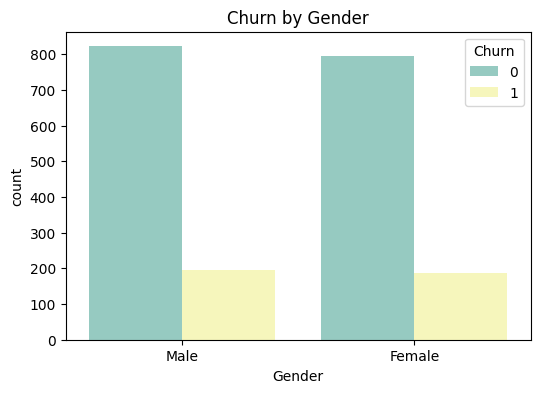

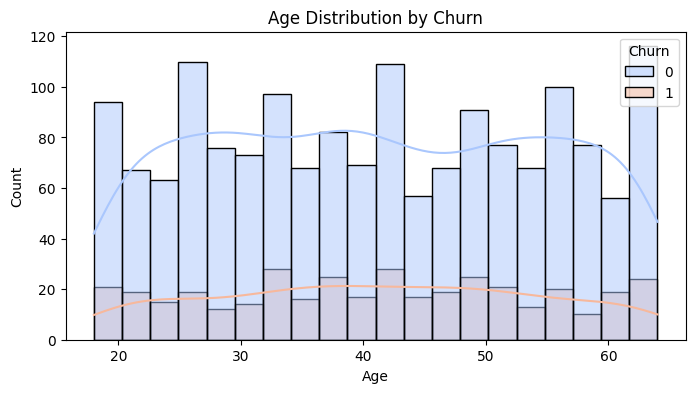

<ipython-input-7-89bd086e0f53>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='EstimatedSalary', data=df, palette='vlag')


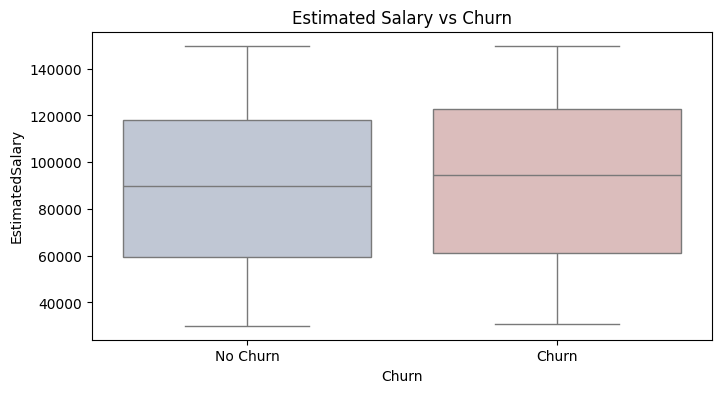

===== Model Performance =====
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88       322
           1       0.20      0.03      0.05        78

    accuracy                           0.79       400
   macro avg       0.50      0.50      0.46       400
weighted avg       0.69      0.79      0.72       400

Confusion Matrix:
 [[314   8]
 [ 76   2]]


<ipython-input-7-89bd086e0f53>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette='Blues_d')


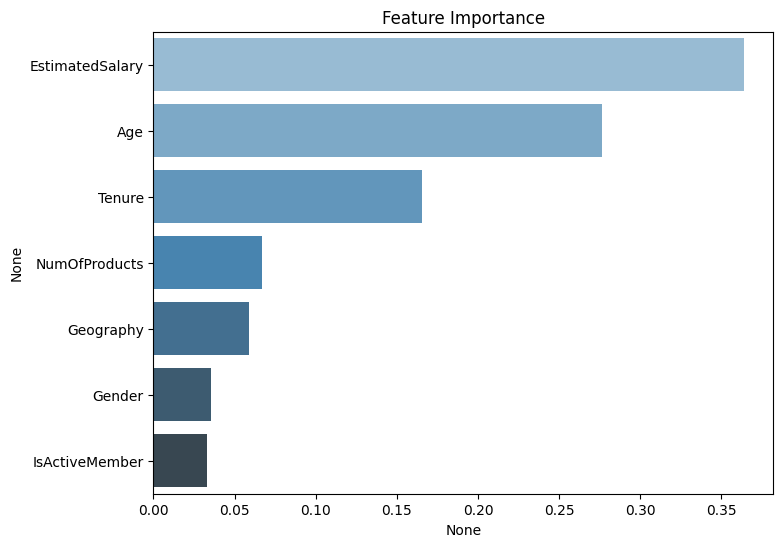

Model Accuracy: 79.00%
Top factors influencing churn:
EstimatedSalary    0.363890
Age                0.276292
Tenure             0.165531
dtype: float64
===== High-Risk Customers (Top 10) =====
      CustomerID  Age  Tenure  NumOfProducts  IsActiveMember  EstimatedSalary  \
1209        2210   63       9              3               1            44440   
505         1506   52       6              1               1            40846   
621         1622   18       0              2               1            68712   
796         1797   53       5              1               0            57528   
1269        2270   37       7              3               1            57746   
5           1006   25      10              2               0            82672   
646         1647   33       8              2               0           148768   
997         1998   21       8              1               1           144462   
1494        2495   45       7              3               1            59960

In [7]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📌 Step 2: Load the data
df = pd.read_csv('customer_churn_sample_2000.csv')
df.head()

# 📌 Step 3: Basic data exploration
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 📊 KPIs
total_customers = df.shape[0]
churn_rate = df['Churn'].mean() * 100

print("===== Key KPIs =====")
print(f"Total Customers: {total_customers}")
print(f"Churn Rate: {churn_rate:.2f}%")

# 📌 Step 4: Data visualization

# 1️⃣ Churn count
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Churn Count')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

# 2️⃣ Churn by Geography
plt.figure(figsize=(8,4))
sns.countplot(x='Geography', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Geography')
plt.show()

# 3️⃣ Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Churn', data=df, palette='Set3')
plt.title('Churn by Gender')
plt.show()

# 4️⃣ Age distribution by Churn
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Age', hue='Churn', kde=True, palette='coolwarm', bins=20)
plt.title('Age Distribution by Churn')
plt.show()

# 5️⃣ Estimated Salary vs Churn
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn', y='EstimatedSalary', data=df, palette='vlag')
plt.title('Estimated Salary vs Churn')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

# 📌 Step 5: Data preprocessing

# Encode categorical features
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])  # France/Spain/Germany

# Features & Target
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Step 6: Model building

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Step 7: Model evaluation
y_pred = model.predict(X_test)

print("===== Model Performance =====")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 📌 Step 8: Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='Blues_d')
plt.title('Feature Importance')
plt.show()

# 📌 Step 9: Model accuracy & top factors
accuracy = model.score(X_test, y_test) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

top_features = feature_importance.head(3)
print("Top factors influencing churn:")
print(top_features)

# 📌 Step 10: High-risk customers

# Predict probabilities on full dataset
probs = model.predict_proba(X_scaled)[:,1]  # probability of churn

df['Churn_Probability'] = probs

# Sort and show top 10 at-risk
high_risk_customers = df[['CustomerID', 'Age', 'Tenure', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Churn_Probability']].sort_values('Churn_Probability', ascending=False).head(10)

print("===== High-Risk Customers (Top 10) =====")
print(high_risk_customers)

# 📌 Step 11: Recommendations
print("===== Recommendations =====")
print("- Focus on retaining customers with low tenure & 1 product")
print("- Offer loyalty programs to high-risk customers")
